# per-embryo gene transcripts

Measurements performed in RNA-seq are always **relative**. By amplifying reads with PCR the original signal gets lost, and all we can measure is the relation between two genes. As an example: gene A is twice as much expressed as B, but we can not say that gene A has 10 transcripts and gene B has 20. If over time a gene gets more expressed compared to all the other genes, does this actually mean that it is more expressed? Or could the gene expression be constant (even declining) but other genes are declining even faster?! In this notebook I will show an example of why working with relative counts is **dangerous**, and can lead to completely wrong conclusions!!

The example dataset of this notebook is from [Owens et al](https://www.sciencedirect.com/science/article/pii/S2211124715014916). They measured the gene expression of a developing frog embryo over time. They used spike-ins to (partly) overcome the problem of that RNA-seq is relative. A spike-in is a known amount of RNA, that you add before PCR. This way you can compare your relative amounts of RNA to the spike in, instead of to all other genes. They added a fixed amount of spike-in *per embryo*, so the transcript counts are normalized per embryo.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, minmax_scale
import matplotlib.patches as patches

from util import gene_landscape

In [2]:
# load the dataset (counts already normalized per embryo)
df = pd.read_table("../data/GSE65785_clutchApolyA_absolute_TPE_gene_isoform.txt.gz", header=[0, 1], index_col=[0, 1])
df.index = pd.MultiIndex.from_tuples(df.index)
df = df.loc["Gene"]

# make a normalized count table (counts per million)
# TPM normalization is common for when you don't have spike-ins.
df_norm = pd.read_table("../data/GSE65785_clutchApolyA_relative_TPM_gene_isoform.txt.gz", header=[0, 1], index_col=[0, 1])
df_norm.index = pd.MultiIndex.from_tuples(df_norm.index)
df_norm = df_norm.loc["Gene"]

# # remove the constant low genes that were poorly fitted by gaussian process
index = ~(df_norm<1/1_000_000).all(axis=1)
df = df[index]
df_norm = df_norm[index]

# calculate the mean expression over time
df.loc["mean"] = df.mean(axis=0)
df_norm.loc["mean"] = df_norm.mean(axis=0)

# df_norm = df.copy().div(df.sum(0)) * 1_000_000

# df_norm = pd.read_table("../data/GSE65785_clutchApolyA_relative_TPM_gene_isoform.txt.gz", index_col=0)

In [3]:
np.all(df.index == df_norm.index)

True

In [4]:
df_norm

,Sample_00,Sample_01,Sample_02,Sample_03,Sample_04,Sample_05,Sample_06,Sample_07,Sample_08,Sample_09,...,Sample_81,Sample_82,Sample_83,Sample_84,Sample_85,Sample_86,Sample_87,Sample_88,Sample_89,Sample_90
,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0
1012069980|,635.755000,724.343000,756.308000,723.542000,746.971000,693.095000,669.271000,747.293000,704.662000,725.425000,...,1497.710000,1515.630000,1361.320000,1316.620000,1259.970000,1362.440000,1241.530000,1520.760000,1230.370000,1377.880000
1012070007|,1024.350000,1075.200000,1141.820000,1059.360000,898.073000,846.848000,764.214000,809.958000,826.598000,764.349000,...,738.626000,814.676000,704.022000,668.994000,611.323000,647.993000,595.096000,726.634000,626.513000,662.729000
1012070179|,160.415000,143.558000,144.956000,141.199000,130.423000,132.247000,112.147000,108.079000,116.567000,110.218000,...,48.400200,48.350900,46.201500,47.559900,62.357900,55.106400,63.890800,43.554100,63.990900,47.543000
1012070219|,694.913000,697.420000,674.751000,644.627000,555.039000,541.384000,474.992000,454.074000,479.959000,449.076000,...,240.948000,278.650000,232.015000,230.023000,212.789000,235.195000,235.309000,280.092000,238.937000,255.771000
1012070250|,42.683500,46.408800,70.131000,92.386600,101.943000,104.817000,108.417000,125.299000,141.147000,121.849000,...,218.961000,233.643000,226.622000,213.325000,195.529000,199.801000,186.405000,220.815000,206.345000,205.664000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xetro.N00476|sox17a,0.076701,0.050272,0.117702,0.067534,0.054061,0.073511,0.035883,0.318149,2.859750,4.956710,...,9.377900,8.010430,8.950350,7.881240,7.314830,8.130210,8.465720,8.977000,8.021980,7.858100
Xetro.N00856|vegt,263.822000,273.742000,385.155000,505.987000,564.720000,589.410000,652.949000,639.075000,587.244000,557.781000,...,0.196596,0.191325,0.664779,0.603650,0.376221,0.593147,0.542492,0.236358,0.284037,0.483604
Xetro.N01631|bix1.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037757,0.000000,0.088299,2.289180,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
df.index

Index(['1012069980|', '1012070007|', '1012070179|', '1012070219|',
       '1012070250|', '1012070405|', '1012070497|', '1012070595|',
       '1012070706|', '1012070757|',
       ...
       'Xetro.N00002|mir427', 'Xetro.N00176|nodal3.1', 'Xetro.N001|sia.3',
       'Xetro.N00246|nodal5', 'Xetro.N00475|sox17b', 'Xetro.N00476|sox17a',
       'Xetro.N00856|vegt', 'Xetro.N01631|bix1.1', 'Xetro.NO.ENS.15697|',
       'mean'],
      dtype='object', length=25732)

# gene expression over time

Now lets show how genes behave over time. Either with per embryo normalization (spike ins), or when we ignore the spike ins and use TPM normalization. 

Note that on the left figure, the mean expression (over all genes) is increasing over time. However on the right figure the mean expression is constant. Whereas on the left figure generally genes seem to be going up over time, on the right figure genes are going both up and down..

note: the genes are picked randomly, feel free to re-run it a couple times to get a better figure.

Text(0.5, 0.98, 'The effect of per spike-in vs TPM normalization')

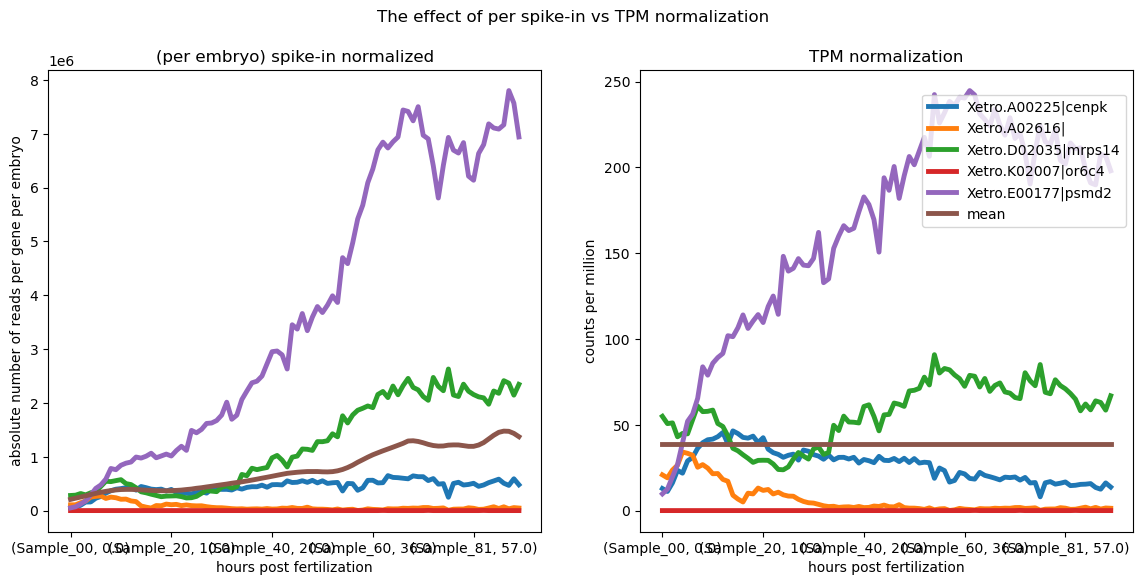

In [6]:
# pick some random genes and plot them
genes = df.sample(5).index.to_list()
genes = [
    'Xetro.A00225|cenpk',
    'Xetro.A02616|',
    'Xetro.D02035|mrps14',
    'Xetro.K02007|or6c4',
    'Xetro.E00177|psmd2'
]
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))

# spike-in
_ = df.loc[genes + ["mean"]].T.plot(
    title="(per embryo) spike-in normalized",
    ylabel="absolute number of reads per gene per embryo",
    xlabel="hours post fertilization",
    linewidth=3.5,
    ax=axs[0]
)

# CPM normalization
_ = df_norm.loc[genes + ["mean"]].T.plot(
    title="TPM normalization",
    ylabel="counts per million",
    xlabel="hours post fertilization",
    linewidth=3.5,
    ax=axs[1]
)

axs[0].get_legend().remove()
axs[1].get_legend().remove()
lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, bbox_to_anchor=(0.90, 0.85))
fig.suptitle("The effect of per spike-in vs TPM normalization")

In [7]:
genes

['Xetro.A00225|cenpk',
 'Xetro.A02616|',
 'Xetro.D02035|mrps14',
 'Xetro.K02007|or6c4',
 'Xetro.E00177|psmd2']

# gene pattern landscape

Inspired by [levin et al.](https://www.nature.com/articles/nature16994) we re-created extended figure 5e for this dataset. Once before CPM normalization and once after. The first figures show the histogram of the correlation coefficients with a line going straight up. When we have spike-in normalized data, the majority of our genes seem to be going up consistently. However when we do TPM normalization we get a split pattern, with genes either going up or down.

In [8]:
gl_raw = gene_landscape(df)
gl_tpm = gene_landscape(df_norm)

In [9]:
gl_raw

,late,mid-development
1012069980|,0.956556,0.040899
1012070007|,0.656906,0.411164
1012070179|,0.143504,0.346718
1012070219|,0.055296,0.450286
1012070250|,0.960619,-0.070989
...,...,...
Xetro.N00476|sox17a,-0.411974,0.113575
Xetro.N00856|vegt,-0.625239,-0.360262
Xetro.N01631|bix1.1,-0.374968,-0.206849
Xetro.NO.ENS.15697|,-0.408055,-0.206930


In [10]:
combined = pd.concat([gl_raw["late"], gl_tpm["late"]], axis=1)
combined.columns = ["per embryo", "TPM"]
combined = combined.melt(ignore_index=False, value_name="test")
combined

,variable,test
1012069980|,per embryo,0.956556
1012070007|,per embryo,0.656906
1012070179|,per embryo,0.143504
1012070219|,per embryo,0.055296
1012070250|,per embryo,0.960619
...,...,...
Xetro.N00476|sox17a,TPM,-0.491791
Xetro.N00856|vegt,TPM,-0.658517
Xetro.N01631|bix1.1,TPM,-0.377789
Xetro.NO.ENS.15697|,TPM,-0.412760


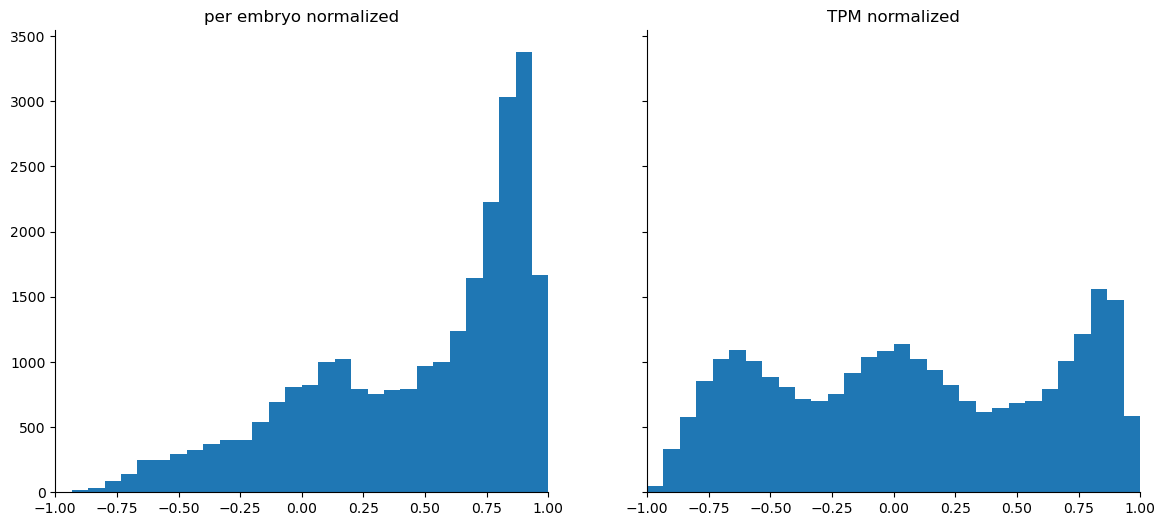

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 6), sharey=True)

_ = axs[0].hist(gl_raw["late"], bins=30, range=(-1, 1))
_ = axs[1].hist(gl_tpm["late"], bins=30, range=(-1, 1))
_ = axs[0].set_title("per embryo normalized")
_ = axs[1].set_title("TPM normalized")
axs[0].spines[['right', 'top']].set_visible(False)
axs[1].spines[['right', 'top']].set_visible(False)
axs[0].set_xlim([-1, 1])
axs[1].set_xlim([-1, 1])
plt.savefig("../imgs/gene_landscape_normalisation.svg")

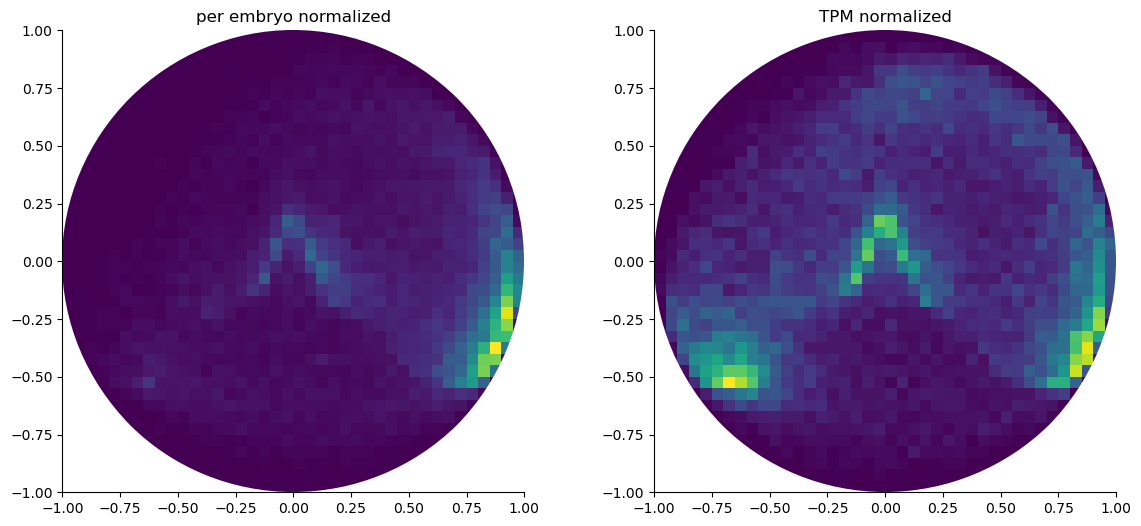

In [59]:
import matplotlib.patches as patches

fig, axs = plt.subplots(ncols=2, figsize=(14, 6))


for i, df in enumerate([gl_raw, gl_tpm]):
    im = axs[i].hist2d(df["late"], df["mid-development"], bins=40, range=[[-1, 1], [-1, 1]])
    axs[i].set_xlim([-1, 1])
    axs[i].set_ylim([-1, 1])
    patch = patches.Circle((0, 0), radius=1, transform=axs[i].transData)
    im[-1].set_clip_path(patch)
    axs[i].set_aspect("equal")
    axs[i].spines[['right', 'top']].set_visible(False)

_ = axs[0].set_title("per embryo normalized")
_ = axs[1].set_title("TPM normalized")

(array([[  13.,    7.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.],
        [  13.,   54.,   15.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.],
        [   9.,   53.,  122.,   19.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.],
        [  19.,   47.,  128.,  163.,   18.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.],
        [  15.,   55.,  105.,  118.,   90.,   24.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.],
        [  20.,   49.,   99.,  102.,   55.,  148.,   19.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0., 

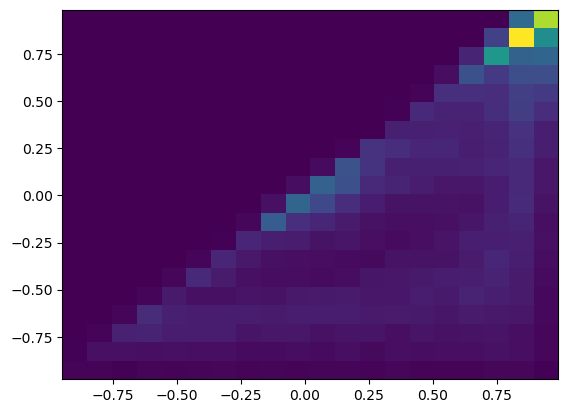

In [25]:
plt.hist2d(gl_raw["late"], gl_cpm["late"], bins=20)

The complete extended figure 5e, both with the late module index as well as the mid-developmental switch shows a similar pattern:

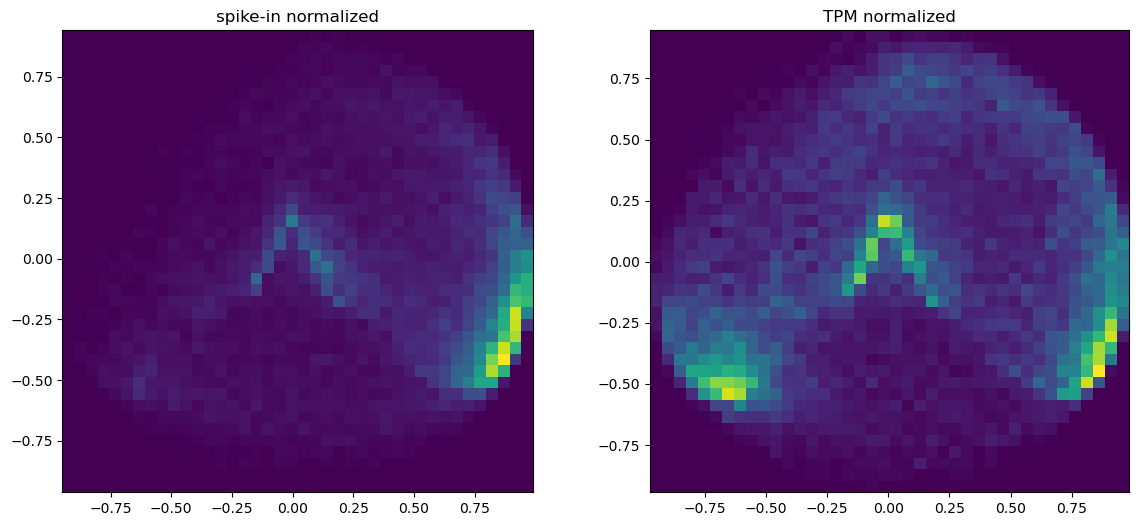

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))

_ = axs[0].set_aspect("equal")
_ = axs[1].set_aspect("equal")
_ = axs[0].hist2d(gl_raw["late"], gl_raw["mid-development"], bins=40)
_ = axs[1].hist2d(gl_tpm["late"], gl_tpm["mid-development"], bins=40)
_ = axs[0].set_title("spike-in normalized")
_ = axs[1].set_title("TPM normalized")

# Normalization can introduce strange artefacts!

Normalization is important! Without normalization it is difficult to compare different time points and samples. However normalization can also introduce strange artefacts! In this example, where if we normalize with spike ins. The gene expression of nearly all genes is increasing over time. However after CPM normalization, approx half of the genes gets upregulated and half gets downregulated...

KeyError: "['ERCC-00136|ERCC-00136', 'Xetro.A02845|Xetro.A02845.2|rps3a', 'Xetro.I00111|Xetro.I00111.4|grsf1', 'ERCC-00095|ERCC-00095'] not in index"

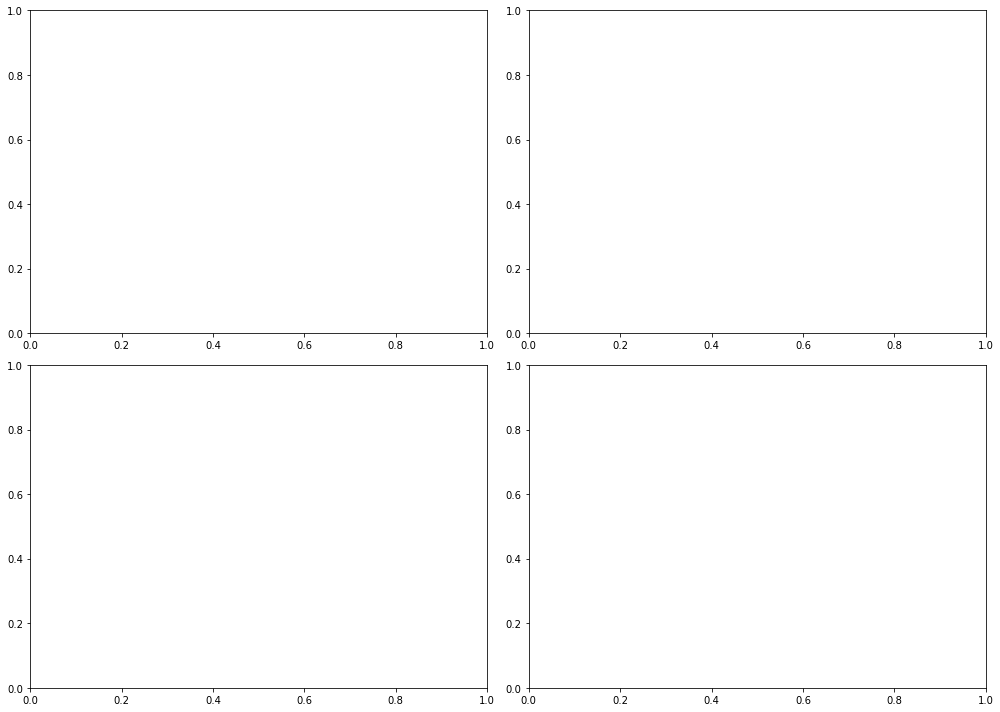

In [10]:
# pick some random genes and plot them
genes = df.sample(5).index.to_list()
genes = [
    "ERCC-00136|ERCC-00136", 
    "Xetro.A02845|Xetro.A02845.2|rps3a", 
    "Xetro.I00111|Xetro.I00111.4|grsf1", 
    "ERCC-00095|ERCC-00095"
]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(14, 10))
fig.tight_layout()
# spike-in
_ = df.loc[genes + ["mean"]].T.plot(
#     title="(per embryo) spike-in normalized",
    ylabel="Counts per embryo",
#     xlabel="hours post fertilization",
    linewidth=4.5,
    ax=axs[0, 0],
)

# CPM normalization
_ = df_norm.loc[genes + ["mean"]].T.plot(
#     title="CPM normalization",
    ylabel="Counts per million",
#     xlabel="hours post fertilization",
    linewidth=4.5,
    ax=axs[1, 0]
)


axs[0, 0].yaxis.set_major_formatter(lambda x, pos: f"{x:,.0f}")
axs[1, 0].yaxis.set_major_formatter(lambda x, pos: f"{x:,.0f}")
axs[0, 0].sharex(axs[1, 0])
axs[0, 0].set_xlim([0, len(df.columns)])

axs[0, 1].hist(gl_raw["late"], bins=20)
axs[1, 1].hist(gl_cpm["late"], bins=20)

axs[0, 1].sharex(axs[1, 1])
axs[1, 1].set_xlim([-0.98, 0.98])
axs[1, 1].sharey(axs[0, 1])

for _ax in axs:
    for ax in _ax:
        ax.set_xticks([])
axs[0, 0].get_legend().remove()
axs[1, 0].get_legend().remove()
lines, labels = axs[0, 0].get_legend_handles_labels()
# fig.legend(lines, labels, bbox_to_anchor=(0.475, 0.465))
fig.legend(lines, labels, bbox_to_anchor=(0.265, 0.97))
# fig.suptitle("The effect of normalization on temporal gene expression")

In [ ]:
# pick some random genes and plot them
genes = [
    "ERCC-00136|ERCC-00136", 
    "Xetro.A02845|Xetro.A02845.2|rps3a", 
    "Xetro.I00111|Xetro.I00111.4|grsf1", 
    "ERCC-00095|ERCC-00095"
]

genes = df.sample(4).index.to_list()
genes = ['Xetro.K00662|Xetro.K00662.1|unnamed', 'Xetro.K00852|Xetro.K00852.2|nacc1', 'Xetro.H01550|Xetro.H01550.3|blvrb', 'Xetro.G00936|Xetro.G00936.1|hcn3']

print(genes)

import sklearn.preprocessing

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 10))
for gene in genes:
    ax.plot(df.columns, sklearn.preprocessing.minmax_scale(df_norm.loc[gene]), linewidth=4.5)

ax.set_ylim([0, 1.01])

# fig.tight_layout()
# # spike-in
# _ = df.loc[genes + ["mean"]].T.plot(
# #     title="(per embryo) spike-in normalized",
#     ylabel="Counts per embryo",
# #     xlabel="hours post fertilization",
#     linewidth=4.5,
#     ax=axs[0, 0],
# )

# # CPM normalization
# _ = df_norm.loc[genes + ["mean"]].T.plot(
# #     title="CPM normalization",
#     ylabel="Counts per million",
# #     xlabel="hours post fertilization",
#     linewidth=4.5,
#     ax=axs[1, 0]
# )


# axs[0, 0].yaxis.set_major_formatter(lambda x, pos: f"{x:,.0f}")
# axs[1, 0].yaxis.set_major_formatter(lambda x, pos: f"{x:,.0f}")
# axs[0, 0].sharex(axs[1, 0])
# axs[0, 0].set_xlim([0, len(df.columns)])

# axs[0, 1].hist(gl_raw["late"], bins=20)
# axs[1, 1].hist(gl_cpm["late"], bins=20)

# axs[0, 1].sharex(axs[1, 1])
# axs[1, 1].set_xlim([-0.98, 0.98])
# axs[1, 1].sharey(axs[0, 1])

# for _ax in axs:
#     for ax in _ax:
#         ax.set_xticks([])
# axs[0, 0].get_legend().remove()
# axs[1, 0].get_legend().remove()
# lines, labels = axs[0, 0].get_legend_handles_labels()
# # fig.legend(lines, labels, bbox_to_anchor=(0.475, 0.465))
# fig.legend(lines, labels, bbox_to_anchor=(0.265, 0.97))
# # fig.suptitle("The effect of normalization on temporal gene expression")

In [ ]:
import genomepy

In [ ]:
df_norm = df.copy().div(df.sum(0)) * 1_000_000

In [ ]:
genes = df_norm.index.to_list()
gene_lengths = pd.DataFrame.from_dict({"gene_length":  np.arange(len(genes)) + 1})
gene_lengths.index = genes
gene_lengths

In [ ]:
df_norm = (df.copy().T / (np.arange(len(genes)) + 1)).T
df_norm = df_norm.div(df_norm.sum(0)) * 1_000_000
df_norm

In [ ]:
df

In [ ]:
for each in df.index:
    print(each)

In [ ]:
plt.scatter(df.mean(axis="columns"), df.var(axis="columns"))

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(6, 6))

ax.scatter(df_norm.mean(axis="columns"), df_norm.var(axis="columns"), s=0.005)
ax.set_yscale('log')
ax.set_xscale('log')